In [1]:
!pip install torch torchvision matplotlib Pillow


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std =[0.229, 0.224, 0.225]),
])

train_set = torchvision.datasets.STL10(root='./data', split='train',
                                       download=True, transform=transform)
test_set  = torchvision.datasets.STL10(root='./data', split='test',
                                       download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True,  num_workers=2)
test_loader  = DataLoader(test_set , batch_size=64, shuffle=False, num_workers=2)

classes = ['airplane','bird','car','cat','deer','dog','horse','monkey','ship','truck']

100%|██████████| 2.64G/2.64G [00:51<00:00, 51.4MB/s]


In [4]:
model = models.squeezenet1_1(pretrained=True)

model.classifier[1] = nn.Conv2d(512, len(classes), kernel_size=1)
model.num_classes = len(classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth


100%|██████████| 4.73M/4.73M [00:00<00:00, 78.5MB/s]


In [5]:
def train_one_epoch():
    model.train()
    running_loss = 0.0
    correct = 0
    total   = 0
    for inputs, labels in tqdm(train_loader, desc='Train', leave=False):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, pred = torch.max(outputs, 1)
        correct += (pred == labels).sum().item()
        total   += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc  = 100. * correct / total
    return epoch_loss, epoch_acc


def evaluate():
    model.eval()
    running_loss = 0.0
    correct = 0
    total   = 0
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Test ', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, pred = torch.max(outputs, 1)
            correct += (pred == labels).sum().item()
            total   += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc  = 100. * correct / total
    return epoch_loss, epoch_acc

In [11]:
num_epochs = 50

train_losses, test_losses = [], []
train_accs  , test_accs   = [], []

for epoch in range(1, num_epochs+1):
    tr_loss, tr_acc = train_one_epoch()
    te_loss, te_acc = evaluate()

    train_losses.append(tr_loss); test_losses.append(te_loss)
    train_accs  .append(tr_acc); test_accs  .append(te_acc)

    print(f'Epoch {epoch:3d} | '
          f'Train loss: {tr_loss:.4f} acc: {tr_acc:5.2f}% | '
          f'Test  loss: {te_loss:.4f} acc: {te_acc:5.2f}%')

Epoch   1 | Train loss: 0.4011 acc: 85.84% | Test  loss: 0.8668 acc: 73.76%


Epoch   2 | Train loss: 0.3084 acc: 89.08% | Test  loss: 1.1451 acc: 71.56%


Epoch   3 | Train loss: 0.3183 acc: 88.60% | Test  loss: 0.9585 acc: 74.33%


Epoch   4 | Train loss: 0.2508 acc: 91.74% | Test  loss: 1.1626 acc: 72.51%


Epoch   5 | Train loss: 0.2219 acc: 92.10% | Test  loss: 1.2043 acc: 72.78%


Epoch   6 | Train loss: 0.2375 acc: 91.66% | Test  loss: 1.2277 acc: 66.81%


Epoch   7 | Train loss: 0.3098 acc: 89.60% | Test  loss: 1.4695 acc: 68.56%


Epoch   8 | Train loss: 0.2519 acc: 91.40% | Test  loss: 0.9799 acc: 72.42%


Epoch   9 | Train loss: 0.1203 acc: 96.22% | Test  loss: 1.2400 acc: 74.25%


Epoch  10 | Train loss: 0.1806 acc: 94.04% | Test  loss: 1.1989 acc: 73.51%


Epoch  11 | Train loss: 0.1347 acc: 95.42% | Test  loss: 1.1820 acc: 72.34%


Epoch  12 | Train loss: 0.1299 acc: 95.60% | Test  loss: 1.1654 acc: 72.64%


Epoch  13 | Train loss: 0.0978 acc: 97.18% | Test  loss: 1.9161 acc: 65.79%


Epoch  14 | Train loss: 0.1338 acc: 95.84% | Test  loss: 1.3140 acc: 74.70%


Epoch  15 | Train loss: 0.1018 acc: 96.86% | Test  loss: 1.3353 acc: 73.00%


Epoch  16 | Train loss: 0.0912 acc: 97.24% | Test  loss: 1.3522 acc: 73.44%


Epoch  17 | Train loss: 0.1216 acc: 96.00% | Test  loss: 1.3244 acc: 75.72%


Epoch  18 | Train loss: 0.1336 acc: 95.72% | Test  loss: 1.1810 acc: 73.66%


Epoch  19 | Train loss: 0.1034 acc: 96.64% | Test  loss: 1.2412 acc: 73.92%


Epoch  20 | Train loss: 0.1331 acc: 95.72% | Test  loss: 1.2861 acc: 73.24%


Epoch  21 | Train loss: 0.0834 acc: 97.20% | Test  loss: 1.4244 acc: 73.85%


Epoch  22 | Train loss: 0.0906 acc: 97.12% | Test  loss: 1.3022 acc: 73.88%


Epoch  23 | Train loss: 0.0809 acc: 97.50% | Test  loss: 1.6839 acc: 71.06%


Epoch  24 | Train loss: 0.1479 acc: 95.66% | Test  loss: 1.1091 acc: 73.97%


Epoch  25 | Train loss: 0.0516 acc: 98.36% | Test  loss: 1.4722 acc: 75.81%


Epoch  26 | Train loss: 0.0253 acc: 99.02% | Test  loss: 1.8709 acc: 73.28%


Epoch  27 | Train loss: 0.0912 acc: 97.10% | Test  loss: 1.3084 acc: 72.47%


Epoch  28 | Train loss: 0.1196 acc: 96.06% | Test  loss: 1.0595 acc: 73.85%


Epoch  29 | Train loss: 0.0414 acc: 98.54% | Test  loss: 1.9031 acc: 70.99%


Epoch  30 | Train loss: 0.1508 acc: 95.48% | Test  loss: 1.3766 acc: 73.29%


Epoch  31 | Train loss: 0.0558 acc: 98.28% | Test  loss: 1.5479 acc: 73.79%


Epoch  32 | Train loss: 0.0520 acc: 98.52% | Test  loss: 1.2812 acc: 72.51%


Epoch  33 | Train loss: 0.1278 acc: 96.02% | Test  loss: 1.3200 acc: 73.79%


Epoch  34 | Train loss: 0.0875 acc: 97.50% | Test  loss: 1.3693 acc: 75.49%


Epoch  35 | Train loss: 0.0536 acc: 98.50% | Test  loss: 1.4970 acc: 74.35%


Epoch  36 | Train loss: 0.0553 acc: 98.46% | Test  loss: 1.4351 acc: 71.36%


Epoch  37 | Train loss: 0.0597 acc: 98.12% | Test  loss: 1.5193 acc: 73.83%


Epoch  38 | Train loss: 0.1454 acc: 95.64% | Test  loss: 1.3852 acc: 74.06%


Epoch  39 | Train loss: 0.0463 acc: 98.38% | Test  loss: 1.4881 acc: 74.08%


Epoch  40 | Train loss: 0.0631 acc: 98.10% | Test  loss: 1.3158 acc: 73.21%


Epoch  41 | Train loss: 0.0842 acc: 97.20% | Test  loss: 1.5151 acc: 73.24%


Epoch  42 | Train loss: 0.0496 acc: 98.58% | Test  loss: 1.6050 acc: 74.04%


Epoch  43 | Train loss: 0.0827 acc: 97.38% | Test  loss: 1.4777 acc: 73.80%


Epoch  44 | Train loss: 0.0501 acc: 98.54% | Test  loss: 1.4826 acc: 73.71%


Epoch  45 | Train loss: 0.0639 acc: 98.20% | Test  loss: 1.4879 acc: 73.65%


Epoch  46 | Train loss: 0.0417 acc: 98.66% | Test  loss: 1.6228 acc: 72.29%


Epoch  47 | Train loss: 0.0540 acc: 98.50% | Test  loss: 1.4808 acc: 74.12%


Epoch  48 | Train loss: 0.0987 acc: 97.04% | Test  loss: 1.3043 acc: 69.59%


Epoch  49 | Train loss: 0.1524 acc: 95.44% | Test  loss: 1.2202 acc: 69.84%


Epoch  50 | Train loss: 0.0887 acc: 97.10% | Test  loss: 1.3605 acc: 72.01%


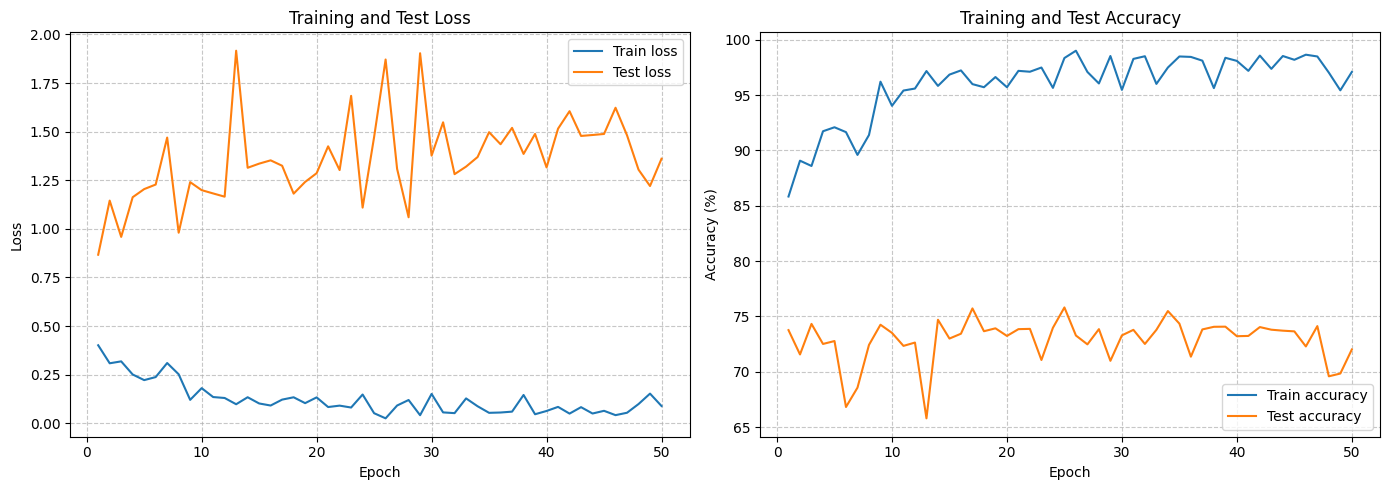

In [12]:
epochs = np.arange(1, num_epochs+1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(epochs, train_losses, label='Train loss',  color='tab:blue')
ax1.plot(epochs, test_losses , label='Test loss',   color='tab:orange')
ax1.set_title('Training and Test Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.plot(epochs, train_accs, label='Train accuracy', color='tab:blue')
ax2.plot(epochs, test_accs , label='Test accuracy',  color='tab:orange')
ax2.set_title('Training and Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()